<a href="https://colab.research.google.com/github/jhengineer/DeepLearning/blob/main/LinearRegression_Reularizaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd

perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [207]:
from sklearn.preprocessing import PolynomialFeatures

#아래함수는 그냥 테스트 용이야.
#degree=2 이차함수. function default value라서 아래에서 생략해라.
poly = PolynomialFeatures(degree=2)
poly.fit([[2,3]]) # 입력값 2,3인 예제. fit 함수에서는 transform 할 준비한다.
                  # 중복조합을 차수별로 어떻게 구성할것인지 내부적으로 코딩되 있겠지. x,(1,0) x*y, x*x, y*y (1,2) (1,1) (2,2) ... 이런식으로.. 암튼 준비단계.

# 실제로 계산은 transform funtion 에서 되는거야. transform까지 해야 완성이지.
print(poly.transform([[2,3]]))
#[[1. 2. 3. 4. 6. 9.]] 1은 상수다. 절편(bias), 2,3은 자기자신, 4=2*2, 6=2*3, 9 = 3*3


[[1. 2. 3. 4. 6. 9.]]


In [208]:
import numpy as np
from sklearn.model_selection import train_test_split

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )


train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42) #75%, 25%

In [209]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(train_input)  # fit은 한번만 한다. 알지? 왜 test_poly할때 안해주는지?
train_poly = poly.transform(train_input)
print(train_poly.shape) #특성이 9개 생성됨. 디퐅트 bias 가 빠져서..
print(poly.get_feature_names_out())

test_poly = poly.transform(test_input)



(42, 9)
['length' ' height' ' width' 'length^2' 'length  height' 'length  width'
 ' height^2' ' height  width' ' width^2']


In [210]:
# preprocessing 된 data로 linearRegression을 돌려보자.
# 흐름이 뭐냐? overfitting을 방지하기위해 특성을 더 늘리는거지. 이전장은 특성이 딸랑2개(길이랑..두께) 아님 1개 였나?(길이)

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly, train_target)

#컬럼벡터로 바꾸는 코드가 빠진이유는 이건 이미 2차원 특성이 세로인 데이터들이 합쳐진거라서.
#컬럼벡터로 바꾸는 이유는 1차원일때 세로 데이터를 넣을라고. 지금은 세로데이터들의 세트잖어.

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

'''
sklearn의 score값은 R제곱 (coefficient of determination) 결정 계수 인데, 1에 가까울수록 좋다.
R2 = 1- (Target - Prediction)^2 합 / (Target - Mean(Target))^2 합
의미가 뭐냐? 분자는 numerator 는 타겟값과 예측값의 오차의 합을 / 예측없이 그냥 평균과의 차이 즉 분산(variance)을 나누는것인데,
모델 오차가 분산중, 분산대비 얼마나 큰지 나타내는것, 즉 분자값 오차가 적으면 적을수록 1에 수렴. converges to 1

'''

#test score = 0.97나왔는데 특성을 더 줘서 점수를 높여보자.

0.9903183436982125
0.9714559911594111


'\nsklearn의 score값은 R제곱 (coefficient of determination) 결정 계수 인데, 1에 가까울수록 좋다.\nR2 = 1- (Target - Prediction)^2 합 / (Target - Mean(Target))^2 합\n의미가 뭐냐? 분자는 numerator 는 타겟값과 예측값의 오차의 합을 / 예측없이 그냥 평균과의 차이 즉 분산(variance)을 나누는것인데,\n모델 오차가 분산중, 분산대비 얼마나 큰지 나타내는것, 즉 분자값 오차가 적으면 적을수록 1에 수렴. converges to 1\n\n'

In [211]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)  # fit은 한번만 한다. 알지? 왜 test_poly할때 안해주는지?
train_poly = poly.transform(train_input)
print(train_poly.shape) #특성이 55개 생성됨. 디퐅트 bias 가 빠져서..
#print(poly.get_feature_names_out())
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))#0.99 완벽한.
print(lr.score(test_poly, test_target)) #-144가 나온다.. 너무overfitting이 되는거지.

'''
overfitting 을 방지하기 위해 Regularizaion 규제를 해줘야해..
Regularization 규제 방법에는
1. 모델을 만들때 잘 overfitting 안되게 만들도록 LinearRegression 말고 Ridge/Lasso/elesticNet 을 써.
그 전에 input data normalization을 먼저 해주서 학습안정화, 수렴속도개선, overfitting 간접방지 해주자.
아래는 Normalizaion
'''


(42, 55)
0.9999999999996433
-144.40579436844948


'\noverfitting 을 방지하기 위해 Regularizaion 규제를 해줘야해..\nRegularization 규제 방법에는  \n1. 모델을 만들때 잘 overfitting 안되게 만들도록 LinearRegression 말고 Ridge/Lasso/elesticNet 을 써.\n그 전에 input data normalization을 먼저 해주서 학습안정화, 수렴속도개선, overfitting 간접방지 해주자.\n아래는 Normalizaion\n'

In [212]:
# 아래는 normalization  표준화 방법
#표준화란. 평균이 0 표준편차가 1일로 두려고 표준값 = 실제값-평균/표준편차.계산한다. 표준편차는 편차들(평균과 실제값차이로 발생되는 거리) 평균.
#의미는 표준편차대비 데이터 값이 어떤지. 나눴으니까.. 몇배로 큰지 작은지.. 표준편차기준으로 데이터를 조정함.
#의미는 표준편차보다 얼마다 너 차이가 있나.. 차이가 작나 많나로 데이터를 조정하는거지..
# normalization 방법에 min-max scaling 이라는것도 있다. 표준값 = x-min/max-min

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # *train_poly 데이터의 평균(mean)과 표준편차(std)**를 계산해서 StandardScaler 객체 ss 안에 저장만 해놓는 겁니다.
                   # fit은 한번만 한다. 알지? 왜 test_poly할때 안해주는지?

train_scaled = ss.transform(train_poly) # 여기서 실제 계산.
test_scaled = ss.transform(test_poly)



In [213]:
'''Ridge Regression(L2 Regularization)
Ridge Regression model
 Loss = MSE + a*sum of (b^2) ; a=hyperparameter, b=coeffieients for features. b는 특성갯수만큼 있다.
 뒷 부분때문에 b값이 무한정 커질수 없으니까.. 기울기들이 약간 줄어드는 효과.. 오버핏팅방지됨.
 come up with!! features are 55이다. 알지? degree=5
'''

from sklearn.linear_model import Ridge

ridge = Ridge() # default a=1이다.
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# 위 ridge 모델 default a=1이다. 하이퍼파라메터를 바꿔서 (람다 혹은 알파라고한다)
# 최적값을 찾아보자. 이런건 자동으로 제공안해주나몰라..

0.9896101671037343
0.9790693977615387


In [214]:
hyperparam_list=[0.001, 0.01,0.1, 1, 10, 100] # 리스트 만들때 tip은 영역을 크게 나눠서 로그스케일로(?) 값을 둔다.
train_score=[]
test_score=[]
for a in hyperparam_list:
  ridge = Ridge(alpha=a)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


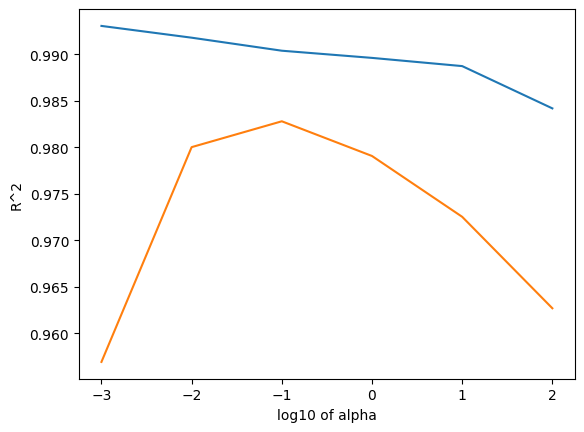

In [215]:
import matplotlib.pyplot as plt

plt.plot(np.log10(hyperparam_list), train_score)
plt.plot(np.log10(hyperparam_list), test_score)
plt.xlabel('log10 of alpha')
plt.ylabel('R^2') #score
plt.show()
#   -1 즉 0.1일때 가장 좋다

In [216]:
'''
0.1이라는 값을 찾았는데 근방의 숫자들을 근처로 더 좋은 알파값을 찾으면 되는데
여기서는 생략하고, 스코어만 프린트한다.
'''
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


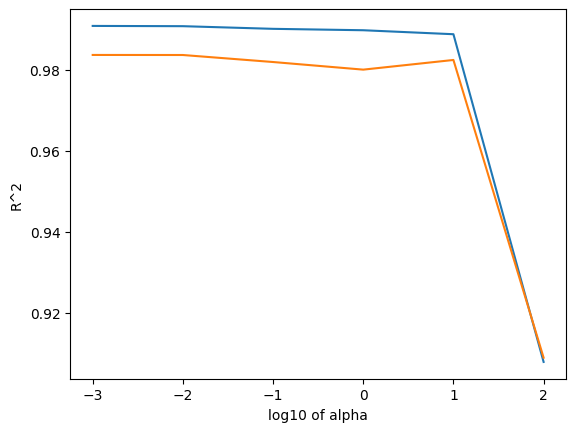

40


In [219]:
#Lasso 가지고도 해 보자.
'''L1 Regulation
Loss = MSE + a*sum of b
규제 영역 마름모. 꼭지점이 축에 걸린다. 특정 변수는 0이 된다..
'''

from sklearn.linear_model import Lasso

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score=[]
test_score=[]

for a in alpha_list:
  lasso = Lasso(alpha=a)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('log10 of alpha')
plt.ylabel('R^2') #score
plt.show()
#
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
train_score.append(lasso.score(train_scaled, train_target))
test_score.append(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ ==0)) # 40 개가 특성 가중치가 0이다 coefficient 가 0 베터값이 0

alpha값 최적화 할때 실제 팁은. cross-validation 기법
only train_Data를 K개로 나눠서 (아마 k는 param from user) 1개는 test용이고 나머지는 train용으로 성능평가를 k번 하는거지. train test set을 돌려가면서..
score 평균이 최고인것으로 모델을 만들어. 실제
RidgeCV / GridSearchCV /LassoCV /ElasticCV 다 있다. 담에 공부해. 안해도 되고..해도 되고.. 필요할떄 공부하지 뭐.